# Image Captioning

In [15]:
from transformers import AutoProcessor, AutoModelForCausalLM
import requests
from PIL import Image
import matplotlib.pyplot as plt

processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco")



c:\Users\franc\.conda\envs\dml\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


a rendering of the new tram.


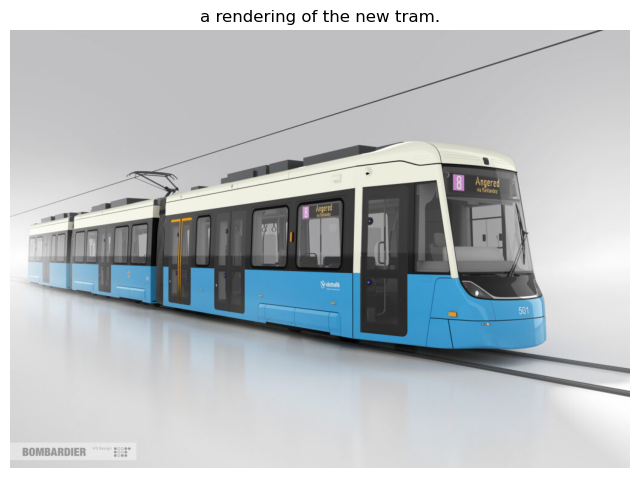

In [16]:
url = "https://goteborgssparvagar.se/wp-content/uploads/2023/07/171024exterior01-webb-1024x723.jpeg"
image = Image.open(requests.get(url, stream=True).raw)

pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print(generated_caption)

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title(generated_caption)
plt.axis('off')  
plt.show()

In [ ]:
print(model)

Use masked pictures with one big patch or a lot of very small patches
Use also filters
evaluate with the scores between a clean picture and a masked one

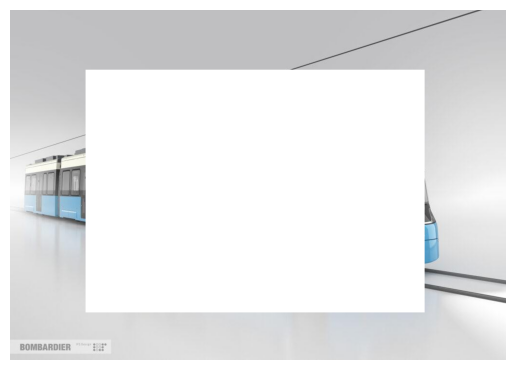

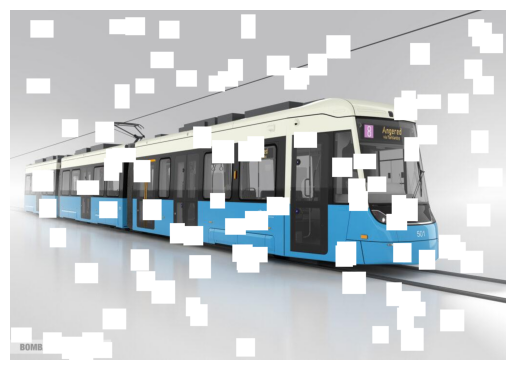

In [26]:
local_image_path = './downloaded_image.jpg'
image.save(local_image_path)

import random
from torchvision import transforms

def apply_big_patch(image, patch_size, patch_value=0):
    C, H, W = image.shape
    top = random.randint(0, H - patch_size[0])
    left = random.randint(0, W - patch_size[1])
    image[:, top:top + patch_size[0], left:left + patch_size[1]] = patch_value
    return image

def apply_random_patches(image, num_patches, patch_size_range, patch_value=0):
    C, H, W = image.shape
    for _ in range(num_patches):
        patch_height = random.randint(patch_size_range[0], patch_size_range[1])
        patch_width = random.randint(patch_size_range[0], patch_size_range[1])
        top = random.randint(0, H - patch_height)
        left = random.randint(0, W - patch_width)
        image[:, top:top + patch_height, left:left + patch_width] = patch_value
    return image

def load_image(image_path):
    transform = transforms.Compose([
        transforms.ToTensor()  
    ])
    image = Image.open(image_path).convert('RGB')
    return transform(image)

def show_image(image_tensor):
    image = image_tensor.permute(1, 2, 0)  
    plt.imshow(image)
    plt.axis('off')
    plt.show()

image_path = local_image_path
image_tensor = load_image(image_path)
patched_image_tensor = apply_big_patch(image_tensor.clone(), patch_size=(500, 700), patch_value=1) 
show_image(patched_image_tensor)
patched_random_tensor = apply_random_patches(image_tensor.clone(), num_patches=100, patch_size_range=[30,50], patch_value=1) 
show_image(patched_random_tensor)

In [24]:
pixel_values = processor(images=patched_image_tensor, return_tensors="pt", do_rescale=False).pixel_values
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

the tram is now on the line


In [27]:
pixel_values = processor(images=patched_random_tensor, return_tensors="pt", do_rescale=False).pixel_values
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

a tram in the future
